In [1]:
import pandas as pd

# 파일 경로 설정
file_path = "../data/data.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 컬럼명 앞뒤 공백 제거
df.columns = df.columns.str.strip()

# 특정 컬럼명을 '평균소요시간'으로 변경
df = df.rename(columns={'2023.5': '평균소요시간'})

# 첫 번째 행 제거 (불필요한 데이터 제거)
df = df.iloc[1:].reset_index(drop=True)

# 문자열을 숫자로 변환, 변환 실패 시 NaN으로 처리
df['평균소요시간'] = pd.to_numeric(df['평균소요시간'], errors='coerce')

# NaN 값 제거
df = df.dropna(subset=['평균소요시간'])

In [2]:
import numpy as np

# 평균과 표준편차 계산
mu = df['평균소요시간'].mean()
sigma = df['평균소요시간'].std()

# 표본 크기 및 반복 횟수 설정
sample_size = 30
num_samples = 1000

# 표본 평균값을 저장할 리스트 생성
sample_means = [
    np.mean(np.random.choice(df['평균소요시간'], size=sample_size, replace=True))
    for _ in range(num_samples)
]

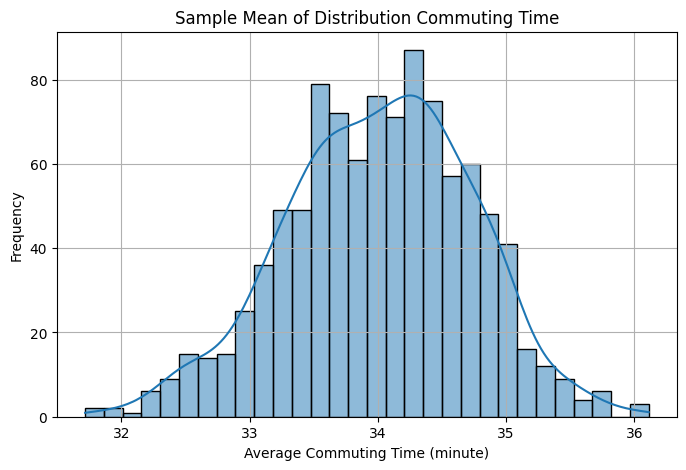

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(8, 5))

# 히스토그램 및 KDE 곡선 시각화
sns.histplot(sample_means, bins=30, kde=True, edgecolor='black')  # [빈칸] 히스토그램을 그리는 코드 작성

# 그래프 제목 및 축 레이블 설정
plt.title('Sample Mean of Distribution Commuting Time')
plt.xlabel('Average Commuting Time (minute)')
plt.ylabel('Frequency')

# 격자 추가
plt.grid(True)

# 그래프 출력
plt.show()